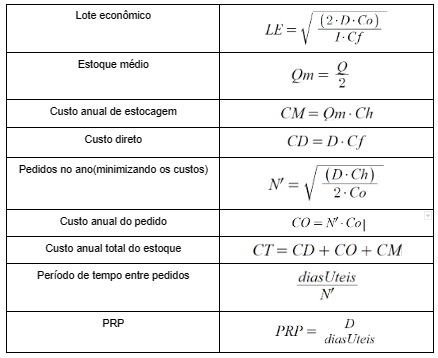

In [ ]:
import json
import pandas as pd
import numpy as np
import math

url = "http://dados.unb.br/dataset/610e158e-f3f2-4438-ba78-8d88aea12784/resource/aeb63a5a-52b8-4966-9bc4-d7eb1fb00925/download/estoque-do-almoxarifado-06-2021.json"
df = pd.read_json(url)
df = df.query("almoxarifado == 'Central'")

df['preco'] = df['preco'].apply(lambda x: float(x.replace('R$', '').replace('.', '').strip().replace(',', '.')))
df['valor_total'] = df['valor_total'].apply(lambda x: float(x.replace('R$', '').replace('.', '').strip().replace(',', '.')))
df['saldo'] = df['saldo'].apply(lambda x: int(x))

In [ ]:
D = df['saldo'] * 2  # exemplo
Co = df['preco'] * 1.5  # exemplo
I = 0.1  # exemplo
Cf = df['preco']
Ch = Cf * I
dias_uteis = 250

In [ ]:
df['lote_economico'] = np.sqrt((2 * D * Co) / Ch)

df['estoque_medio'] = df['lote_economico'] / 2

df['custo_anual_estocagem'] = df['estoque_medio'] * Ch

df['n_pedidos'] = D / df['lote_economico'] # mesma fórmula

df['custo_anual_pedido'] = df['n_pedidos'] * Co

df['custo_anual_total'] = D * Cf + df['custo_anual_pedido'] + df['custo_anual_estocagem'] # mesma fórmula

df['tempo_entre_pedidos'] = dias_uteis / df['n_pedidos']

df['prp'] = D / dias_uteis

df['giro_estoque'] = D / df['estoque_medio']

In [ ]:
format_dict = {
    'lote_economico': '{:,.1f} unidades',
    'estoque_medio': '{:,.1f} unidades',
    'custo_anual_estocagem': 'R${:,.2f}',
    'n_pedidos': '{:,.1f}',
    'custo_anual_pedido': 'R${:,.2f}',
    'custo_anual_total': 'R${:,.2f}',
    'tempo_entre_pedidos': '{:,.1f} dias',
    'prp': '{:,.1f} unidades/dia',
    'giro_estoque': '{:,.1f} giros',
    'preco': 'R${:,.2f}',
    'valor_total': 'R${:,.2f}'
}

In [ ]:
(df.style.format(format_dict))

,material,almoxarifado,saldo,preco,valor_total,lote_economico,estoque_medio,custo_anual_estocagem,n_pedidos,custo_anual_pedido,custo_anual_total,tempo_entre_pedidos,prp,giro_estoque
0,"AÇÚCAR, CRISTAL, 5 KG",Central,719,R$8.60,"R$6,179.81",207.7 unidades,103.9 unidades,R$89.31,6.9,R$89.31,"R$12,545.42",36.1 dias,5.8 unidades/dia,13.8 giros
1,"ÁGUA, MINERAL, SEM GÁS, GARRAFÃO, 20 LT",Central,1299,R$5.16,"R$6,702.96",279.2 unidades,139.6 unidades,R$72.03,9.3,R$72.03,"R$13,549.74",26.9 dias,10.4 unidades/dia,18.6 giros
2,"ÁGUA, SANITÁRIA, 1 LITRO",Central,198,R$1.37,R$272.06,109.0 unidades,54.5 unidades,R$7.47,3.6,R$7.47,R$557.45,68.8 dias,1.6 unidades/dia,7.3 giros
3,"AGULHAS, COLETA, SANGUE, VÁCUO, 21 G X 1'.",Central,160,R$1.72,R$275.20,98.0 unidades,49.0 unidades,R$8.43,3.3,R$8.43,R$567.25,76.5 dias,1.3 unidades/dia,6.5 giros
4,"ÁLCOOL, ETÍLICO, 92,8 INPM, 1 LITRO",Central,1644,R$3.63,"R$5,967.72",314.1 unidades,157.0 unidades,R$57.00,10.5,R$57.00,"R$12,049.45",23.9 dias,13.2 unidades/dia,20.9 giros
5,"ALCOOL, ETILICO , GEL, 70% , 1L",Central,652,R$9.90,"R$6,454.80",197.8 unidades,98.9 unidades,R$97.90,6.6,R$97.90,"R$13,105.41",37.9 dias,5.2 unidades/dia,13.2 giros
6,"ALCOOL, ETILICO, LÍQUIDO, 70% , 1L",Central,3650,R$7.61,"R$27,776.50",468.0 unidades,234.0 unidades,R$178.06,15.6,R$178.06,"R$55,909.13",16.0 dias,29.2 unidades/dia,31.2 giros
7,"ALFINETE, MAPA, NÚMERO 3",Central,75,R$1.92,R$144.00,67.1 unidades,33.5 unidades,R$6.44,2.2,R$6.44,R$300.88,111.8 dias,0.6 unidades/dia,4.5 giros
8,"ALMOFADA, CARIMBO, AZUL",Central,31,R$2.23,R$69.13,43.1 unidades,21.6 unidades,R$4.81,1.4,R$4.81,R$147.88,173.9 dias,0.2 unidades/dia,2.9 giros
9,"ALMOFADA, CARIMBO, PRETA",Central,122,R$1.39,R$169.58,85.6 unidades,42.8 unidades,R$5.95,2.9,R$5.95,R$351.05,87.7 dias,1.0 unidades/dia,5.7 giros
